In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

In [29]:
import soundfile as sf

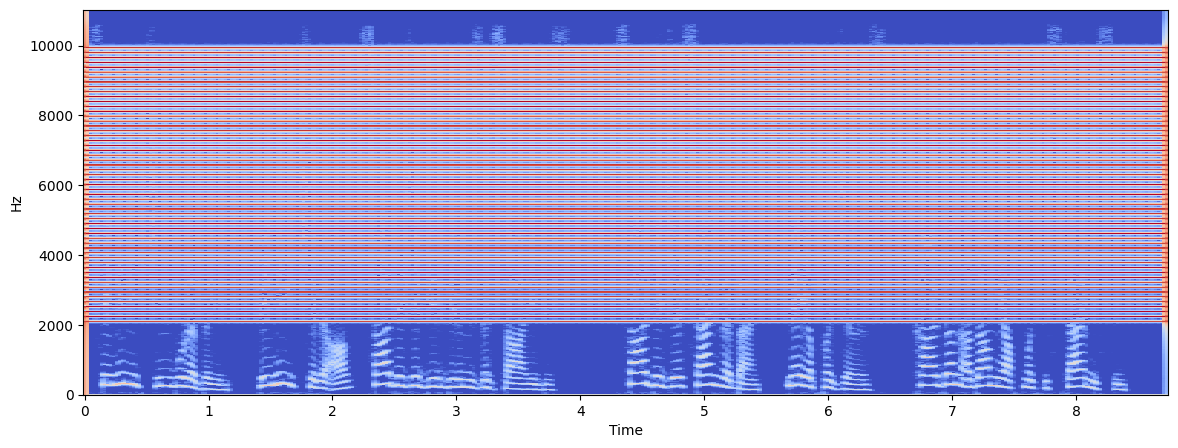

In [56]:
x, sr = librosa.load('C.Noisy_Voice.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [90]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, irfft
from scipy.io.wavfile import write

samplerate, data = wavfile.read('C.Noisy_Voice.wav')
print(samplerate)
N = len(data)
yf = fft(data)
xf = fftfreq(N, 1 / samplerate)

# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (samplerate / 2)
target_idx = int(points_per_freq * 100) # target 100Hz frequency
target_idx2 = int(points_per_freq * 1000) # target 2000Hz frequency
yf[:target_idx] = 0 # Filter out all frequencies below 100Hz
yf[target_idx2:] = 0 # Filter out all frequencies above 2000Hz
new_sig = irfft(yf) # Apply inverse FFT
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max())) # Normalize the signal
write("clean.wav",  int(samplerate*2), norm_new_sig) # Write the signal to a file

24000


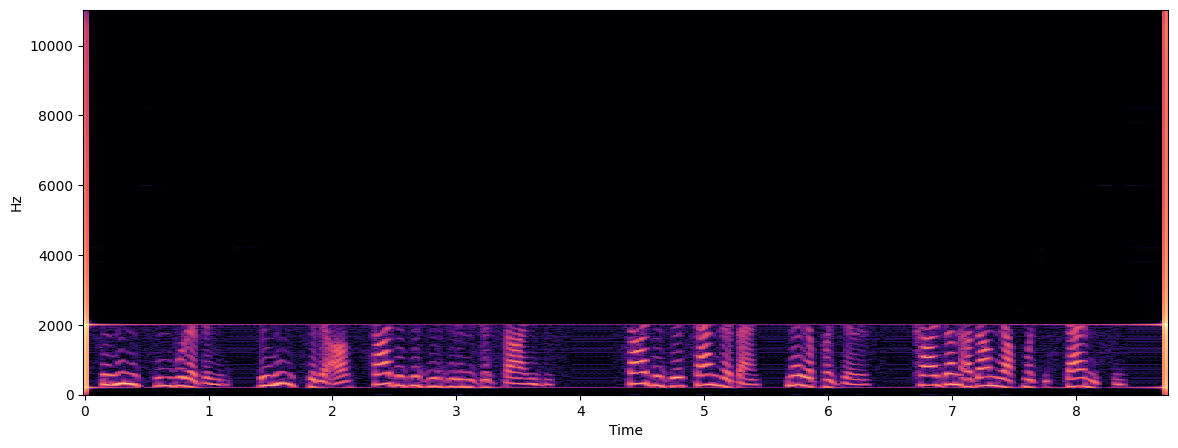

In [91]:
x, sr = librosa.load('clean.wav')
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [92]:
import IPython.display as ipd
ipd.Audio('clean.wav') # load a local WAV file

In [93]:
from pydub import AudioSegment

def atch_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

sound = AudioSegment.from_file("clean.wav", "wav")
normalized_sound = match_target_amplitude(sound, -10.0)
normalized_sound.export("normalizedAudio.wav", format="wav")

<_io.BufferedRandom name='normalizedAudio.wav'>

In [94]:
import IPython.display as ipd
ipd.Audio('normalizedAudio.wav') # load a local WAV file